# Comparación: Regresión Logística vs SVM (Lineal y RBF)
Dataset: `diabetes_prediction_dataset.csv`  
Objetivo: comparar modelos de **clasificación** para predecir `diabetes` (0/1) siguiendo los siguientes bloques:
1) Preparación
2) Regresión logística
3) SVM lineal
4) SVM con kernel RBF



> Nota: los cálculos pueden ralentizarse, el Dataset está en el límite de empezar a ser difícil de manejar

## 0. Importaciones

In [52]:
# Importamos las librerias necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Importamos el dataset
df_diabetes = pd.read_csv('diabetes_prediction_dataset.csv')

diabetes = pd.get_dummies(df_diabetes, drop_first=True, dtype=int)
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   age                          100000 non-null  float64
 1   hypertension                 100000 non-null  int64  
 2   heart_disease                100000 non-null  int64  
 3   bmi                          100000 non-null  float64
 4   HbA1c_level                  100000 non-null  float64
 5   blood_glucose_level          100000 non-null  int64  
 6   diabetes                     100000 non-null  int64  
 7   gender_Male                  100000 non-null  int64  
 8   gender_Other                 100000 non-null  int64  
 9   smoking_history_current      100000 non-null  int64  
 10  smoking_history_ever         100000 non-null  int64  
 11  smoking_history_former       100000 non-null  int64  
 12  smoking_history_never        100000 non-null  int64  
 13  

In [53]:
diabetes.corr().sort_values(by='diabetes', ascending=False)['diabetes'][1::].abs()

blood_glucose_level            0.419558
HbA1c_level                    0.400660
age                            0.258008
bmi                            0.214357
hypertension                   0.197823
heart_disease                  0.171727
smoking_history_former         0.097917
gender_Male                    0.037666
smoking_history_never          0.027267
smoking_history_ever           0.024080
smoking_history_not current    0.020734
smoking_history_current        0.019606
gender_Other                   0.004090
Name: diabetes, dtype: float64

## 1) Bloque 1 — Preparación: carga y exploración
Objetivo del bloque: dejar el dataset listo para entrenar modelos.

- Detectamos columnas numéricas y categóricas.
- Hacemos `train_test_split` con `stratify=y`.
- **Escalamos** numéricas (imprescindible para SVM).
- Codificamos categóricas con One-Hot.


In [54]:
# Dividimos el dataset en variables predictoras y variable objetivo
X = diabetes.drop('diabetes', axis=1) 
y = diabetes['diabetes']

# Escalamos las variables
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X)

# Dividimos el dataset en conjunto de entrenamiento y conjunto de prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

### Funciones auxiliares de evaluación
Calculamos métricas estándar y pintamos:
- No olvidar Matriz de confusión

## 2) Bloque 2 — Regresión Logística
Entrenamos una regresión logística y evaluamos.



              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.86      0.64      0.73      1700

    accuracy                           0.96     20000
   macro avg       0.91      0.81      0.86     20000
weighted avg       0.96      0.96      0.96     20000

Precision: 0.96045


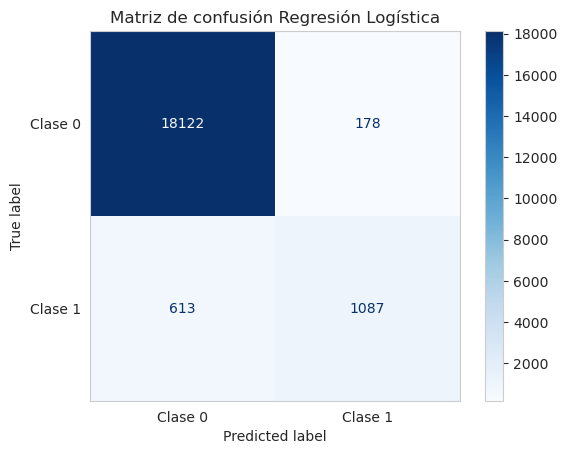

In [55]:
# Entrenamos el modelo de regresión logística
model = LogisticRegression(random_state=42, C=1, solver='liblinear') 
model.fit(X_train, y_train)

# Realizamos predicciones
y_pred = model.predict(X_test)

# Evaluamos el modelo
print(classification_report(y_test, y_pred)) 
print("Precision:", model.score(X_test, y_test))

# Matriz de confusión de regresión logística
cm_svm = confusion_matrix(y_test, y_pred) 
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=["Clase 0", "Clase 1"]) 
disp_svm.plot(cmap="Blues") 
plt.grid(False)
plt.title("Matriz de confusión Regresión Logística") 
plt.show()

## 3) Bloque 3 — SVM lineal
Entrenamos una SVM con kernel lineal.



              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18300
           1       0.90      0.60      0.72      1700

    accuracy                           0.96     20000
   macro avg       0.93      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000

Precision SVM: 0.96075


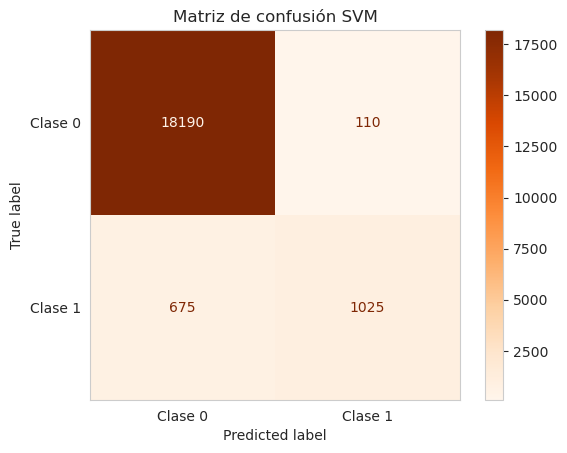

In [56]:
# Ahora entrenamos el modelo con SVM con kernel lineal
from sklearn.svm import SVC 
svm_model = SVC(kernel='linear', random_state=42, C=1) 
svm_model.fit(X_train, y_train)

# Realizamos predicciones con el modelo SVM
y_pred_svm = svm_model.predict(X_test)

# Evaluamos el modelo SVM
print(classification_report(y_test, y_pred_svm)) 
print("Precision SVM:", svm_model.score(X_test, y_test))

# Matriz de confusión para el modelo SVM
cm_svm = confusion_matrix(y_test, y_pred_svm) 
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=["Clase 0", "Clase 1"]) 
disp_svm.plot(cmap="Oranges")
plt.grid(False)
plt.title("Matriz de confusión SVM") 
plt.show()

## 4) Bloque 4 — SVM con kernel RBF
Entrenamos una SVM con kernel gaussiano (RBF).



              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18300
           1       0.92      0.65      0.76      1700

    accuracy                           0.97     20000
   macro avg       0.95      0.82      0.87     20000
weighted avg       0.96      0.97      0.96     20000

Precision SVM RBF: 0.96545


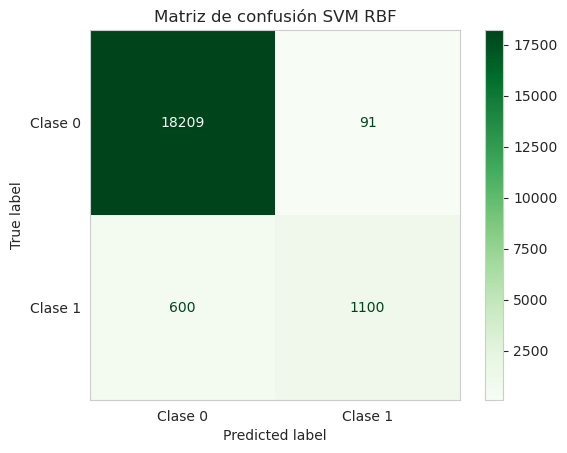

In [57]:
# Entrenamos el modelo con SVM con kernel RBF
svm_rbf_model = SVC(kernel='rbf', random_state=42, C=10, gamma=0.6) 
svm_rbf_model.fit(X_train, y_train)

# Realizamos predicciones con el modelo SVM RBF
y_pred_svm_rbf = svm_rbf_model.predict(X_test)

# Evaluamos el modelo SVM RBF
print(classification_report(y_test, y_pred_svm_rbf)) 
print("Precision SVM RBF:", svm_rbf_model.score(X_test, y_test))

# Matriz de confusión para el modelo SVM RBF
cm_svm_rbf = confusion_matrix(y_test, y_pred_svm_rbf) 
disp_svm_rbf = ConfusionMatrixDisplay(confusion_matrix=cm_svm_rbf, display_labels=["Clase 0", "Clase 1"]) 
disp_svm_rbf.plot(cmap="Greens")
plt.grid(False)
plt.title("Matriz de confusión SVM RBF") 
plt.show()

## 5) Resumen
Comparamos resultados en una tabla.

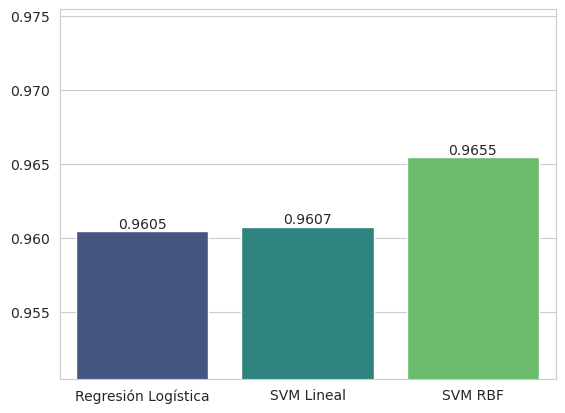

In [58]:
models = ['Regresión Logística', 'SVM Lineal', 'SVM RBF']
scores = [model.score(X_test, y_test), svm_model.score(X_test, y_test), svm_rbf_model.score(X_test, y_test)]

ax = sns.barplot(x=models, y=scores, palette='viridis', hue=models, legend=False)

# Zoom y etiquetas
plt.ylim(min(scores) - 0.01, max(scores) + 0.01)
for i, v in enumerate(scores):
    ax.text(i, v, f'{v:.4f}', ha='center', va='bottom')

plt.show()

### Preguntas
1. ¿Qué modelo tiene mejor **recall** para la clase positiva (`diabetes=1`)?

    El mejor recall para la clase positiva (diabetes=1) es el de SVM RBF (0.9655), seguido por SVM lineal (0.9607) y Regresión Logística (0.9605).
    La diferencia es pequeña entre todos los modelos, y encima el modelo de regresión logística es el más rapido

2. En un contexto médico, ¿qué error es más grave: **FP** o **FN**? Explica.

    En contexto médico suele ser más grave un FN (decir “no diabetes” cuando sí la hay), porque retrasa diagnóstico y tratamiento.
    Un FP genera pruebas extra, pero normalmente es menos peligroso que no detectar un caso real.

3. ¿Qué modelo escogerías si tu prioridad es **interpretabilidad**? ¿y si tu prioridad es **rendimiento**?

    - Para interpretabilidad, escogería Regresión Logística (coeficientes claros y efecto de variables más explicable).
    - Para rendimiento, en tus resultados gana SVM RBF (accuracy 0.96545).

4. ¿Por qué el escalado afecta más a SVM que a la logística?

    SVM depende fuertemente de distancias y del margen; si las variables están en escalas distintas, una domina la frontera.
    La logística también mejora con escalado, pero es menos sensible porque no usa kernel ni distancias directas igual que SVM.

5. Si el dataset está desbalanceado, ¿qué métrica sería más fiable que accuracy?

    Si el dataset está desbalanceado, podremos usar el recall, F1-score



## Ejemplo de Curva ROC con Regresión Logistica

AUC del modelo: 0.9625


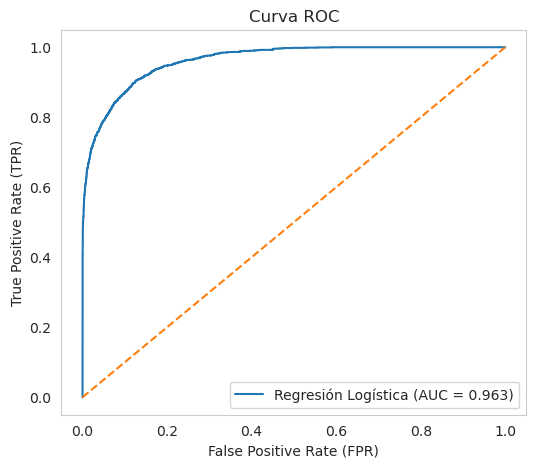

In [59]:
# ============================================================
# Cálculo y visualización de la curva ROC y del AUC
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
# Para variar la curva ROC en regresión logística debes modificar:

# C (regularización)

# penalty (consultar documentación oficial)

# Datos de entrenamiento
# ============================================================

import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# 1️. Entrenamos modelo (si no lo estuviera ya)
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# 2️. Obtenemos probabilidades de la clase positiva
y_prob = modelo.predict_proba(X_test)[:, 1]

# 3️. Calculamos puntos de la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# 4️. Calculamos AUC
auc = roc_auc_score(y_test, y_prob)

print(f"AUC del modelo: {auc:.4f}")

# 5️. Representación gráfica
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"Regresión Logística (AUC = {auc:.3f})")
plt.plot([0,1], [0,1], linestyle="--")  # Línea diagonal (modelo aleatorio)

plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Curva ROC")
plt.legend()
plt.grid()
plt.show()


## Representación de Curva ROC de los 3 modelos

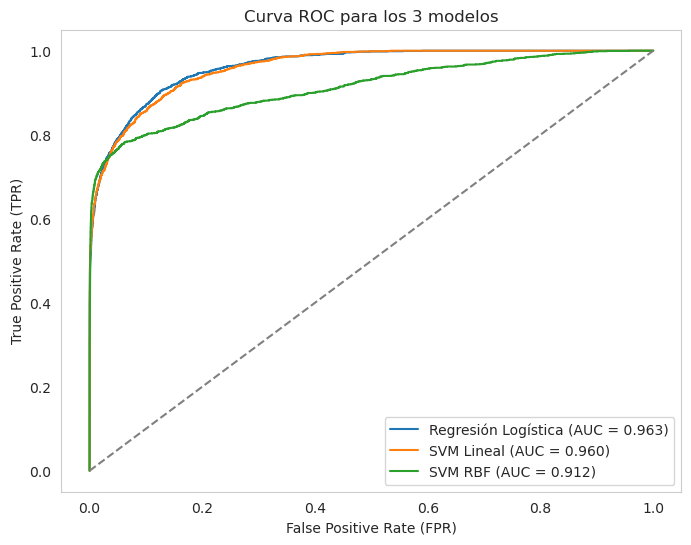

In [60]:
# Teniendo los 3 modelos entrenados, voy a representar la curva ROC para cada uno para comparar su rendimiento.
from sklearn.metrics import roc_curve, roc_auc_score

# Función para calcular y representar la curva ROC
y_prob_logistic = model.predict_proba(X_test)[:, 1]
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_prob_logistic) 
auc_logistic = roc_auc_score(y_test, y_prob_logistic)

y_prob_svm = svm_model.decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm) 
auc_svm = roc_auc_score(y_test, y_prob_svm) 

y_prob_svm_rbf = svm_rbf_model.decision_function(X_test)
fpr_svm_rbf, tpr_svm_rbf, _ = roc_curve(y_test, y_prob_svm_rbf) 
auc_svm_rbf = roc_auc_score(y_test, y_prob_svm_rbf)

# Representación gráfica
plt.figure(figsize=(8,6)) 
plt.plot(fpr_logistic, tpr_logistic, label=f"Regresión Logística (AUC = {auc_logistic:.3f})") 
plt.plot(fpr_svm, tpr_svm, label=f"SVM Lineal (AUC = {auc_svm:.3f})") 
plt.plot(fpr_svm_rbf, tpr_svm_rbf, label=f"SVM RBF (AUC = {auc_svm_rbf:.3f})") 
plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate (FPR)") 
plt.ylabel("True Positive Rate (TPR)") 
plt.title("Curva ROC para los 3 modelos") 
plt.legend() 
plt.grid() 
plt.show()